## Individual Task 3:
####     Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? State chosen is Texas

In [1]:
import pandas as pd
import numpy as np

#importing the project csv
superT = pd.read_csv('ProjectDataStage1WIDEFORMAT.csv')
superT.head(10)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
5,5,1009,Blount County,AL,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
6,6,1011,Bullock County,AL,10101,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
7,7,1013,Butler County,AL,19448,0,0,0,0,0,...,132,132,132,132,132,132,132,132,132,132
8,8,1015,Calhoun County,AL,113605,0,0,0,0,0,...,683,683,683,683,683,683,683,683,683,683
9,9,1017,Chambers County,AL,33254,0,0,0,0,0,...,172,172,172,172,172,172,172,172,172,172


Calculate the data trends for the last week of data.

In [2]:
# create dataframe for new task based on the super table
st = superT

# Calculate data trends for last week of covid cases for a specific state by taking the average of the week and subtracting the diffrence of the first day
st['DataTrend'] = ((st['2023-07-17_Cases'] + st['2023-07-18_Cases'] + st['2023-07-19_Cases'] + st['2023-07-20_Cases'] + st['2023-07-21_Cases'] + st['2023-07-22_Cases'] + st['2023-07-23_Cases'])/7) - st['2023-07-17_Cases']

# Filter the data by State and important columns for last week of data
st = st[superT['State'] == "TX"]
st = st[['countyFIPS','County Name', 'State', 'population', '2023-07-17_Cases', '2023-07-18_Cases', '2023-07-19_Cases', '2023-07-20_Cases', '2023-07-21_Cases', '2023-07-22_Cases', '2023-07-23_Cases', 'DataTrend']] # 

# This creates a column that takes the data trend calculation and shows, increasing, decreasing or stabilized covid cases. 
# If equal to zero then cases have stabilized, if greater it is increasing, if less than then it is decreasing.
st['DataIDS'] = np.where(st['DataTrend'] == 0, 'Stabilized', np.where(st['DataTrend'] > 0, 'Increasing', 'Decreasing'))

# Now we have 1 more column of data that tells us the trend of the last week
st.head(10)

,countyFIPS,County Name,State,population,2023-07-17_Cases,2023-07-18_Cases,2023-07-19_Cases,2023-07-20_Cases,2023-07-21_Cases,2023-07-22_Cases,2023-07-23_Cases,DataTrend,DataIDS
2568,0,Statewide Unallocated,TX,0,4499,4499,4499,4499,4499,4499,4499,0.0,Stabilized
2569,48001,Anderson County,TX,57735,13581,13581,13581,13581,13581,13581,13581,0.0,Stabilized
2570,48003,Andrews County,TX,18705,5777,5777,5777,5777,5777,5777,5777,0.0,Stabilized
2571,48005,Angelina County,TX,86715,2636,2636,2636,2636,2636,2636,2636,0.0,Stabilized
2572,48007,Aransas County,TX,23510,650,650,650,650,650,650,650,0.0,Stabilized
2573,48009,Archer County,TX,8553,15461,15461,15461,15461,15461,15461,15461,0.0,Stabilized
2574,48011,Armstrong County,TX,1887,7213,7213,7213,7213,7213,7213,7213,0.0,Stabilized
2575,48013,Atascosa County,TX,51153,1741,1741,1741,1741,1741,1741,1741,0.0,Stabilized
2576,48015,Austin County,TX,30032,4226,4226,4226,4226,4226,4226,4226,0.0,Stabilized
2577,48017,Bailey County,TX,7000,26233,26233,26233,26233,26233,26233,26233,0.0,Stabilized


Last 7 days of coivd cases graphed on a line graph to show data trend

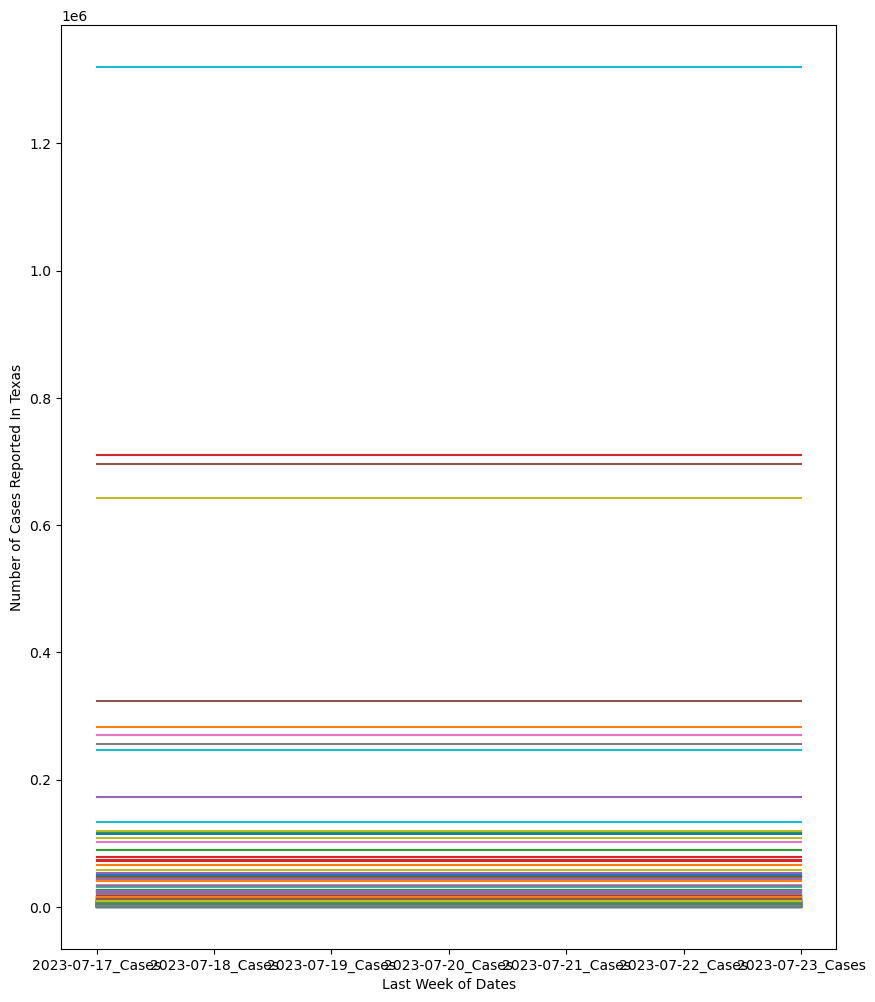

In [3]:
import matplotlib.pyplot as plt
import matplotlib

# Construct our plot with the last seven days of cases.
stPlot = st[['County Name', '2023-07-17_Cases', '2023-07-18_Cases', '2023-07-19_Cases', '2023-07-20_Cases', '2023-07-21_Cases', '2023-07-22_Cases', '2023-07-23_Cases']].set_index('County Name')

txPlot = stPlot.T.plot(figsize=(10,12))

# Naming our axis
txPlot.set_ylabel('Number of Cases Reported In Texas')
txPlot.set_xlabel('Last Week of Dates')

# Had to remove the legend to as it was causing errors.
txPlot.get_legend().set_visible(False)

plt.show()

### Each student member creates notebooks to read the Enrichment data and displays them on a notebook.
Shown below is the enrichment data from the Census Demographic ACS dataset.

In [4]:
# Data has been pre-filter and altered on the Census website and within excel
# the data has been filter to only include estimates and was transmogrified.
# within excel some of the data was cleaned and where county and state were
# split into two different columns.

demo = pd.read_csv('County-Demo.csv', skipinitialspace=True)
# Remove leading white space from column titles
demo.columns = demo.columns.str.lstrip()
demo.head(10)

,County,State,SEX AND AGE,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,...,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male.1,Female.1
0,Baldwin County,Alabama,NaN,"246,435","120,664","125,771",95.9,"12,553","15,581","13,705",...,71,210,"11,495","1,825","9,670","132,299",NaN,"189,876","91,296","98,580"
1,Calhoun County,Alabama,NaN,"115,788","56,554","59,234",95.5,"6,661","5,376","7,505",...,122,"1,518","2,664",330,"2,334","53,408",NaN,"90,642","43,301","47,341"
2,Cullman County,Alabama,NaN,"90,665","45,051","45,614",98.8,"5,449","5,785","5,204",...,47,179,"2,769",897,"1,872","39,893",NaN,"69,096","33,827","35,269"
3,DeKalb County,Alabama,NaN,"71,998","36,024","35,974",100.1,"4,031","5,086","4,491",...,0,650,"2,506",453,"2,053","31,022",NaN,"52,110","25,847","26,263"
4,Elmore County,Alabama,NaN,"89,563","43,448","46,115",94.2,"4,519","4,559","6,623",...,0,106,"3,331",396,"2,935","37,379",NaN,"69,952","33,471","36,481"
5,Etowah County,Alabama,NaN,"103,088","50,443","52,645",95.8,"5,947","7,009","5,394",...,0,"1,787","2,841",229,"2,612","47,642",NaN,"79,217","37,567","41,650"
6,Houston County,Alabama,NaN,"108,079","51,728","56,351",91.8,"6,746","7,020","6,384",...,0,107,"4,196","1,002","3,194","50,207",NaN,"82,000","38,097","43,903"
7,Jefferson County,Alabama,NaN,"665,409","316,006","349,403",90.4,"40,023","42,312","41,999",...,0,"4,117","13,700","2,575","11,125","310,678",NaN,"496,342","229,166","267,176"
8,Lauderdale County,Alabama,NaN,"95,878","45,733","50,145",91.2,"4,503","5,082","5,856",...,0,499,"2,997",480,"2,517","44,914",NaN,"75,487","36,040","39,447"
9,Lee County,Alabama,NaN,"180,773","89,415","91,358",97.9,"9,451","10,865","10,460",...,96,"1,212","5,145",439,"4,706","79,626",NaN,"138,134","66,937","71,197"


In [5]:
# This is a dictionary of State names and their abbreviations
# Which we need to utilize since it is our only method of joining the two tables.
stateAbb = { 'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }

# Add new column with the state abreviation.
demo['StateAbb'] = demo['State'].map(stateAbb)

demo.head()

,County,State,SEX AND AGE,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male.1,Female.1,StateAbb
0,Baldwin County,Alabama,NaN,"246,435","120,664","125,771",95.9,"12,553","15,581","13,705",...,210,"11,495","1,825","9,670","132,299",NaN,"189,876","91,296","98,580",AL
1,Calhoun County,Alabama,NaN,"115,788","56,554","59,234",95.5,"6,661","5,376","7,505",...,"1,518","2,664",330,"2,334","53,408",NaN,"90,642","43,301","47,341",AL
2,Cullman County,Alabama,NaN,"90,665","45,051","45,614",98.8,"5,449","5,785","5,204",...,179,"2,769",897,"1,872","39,893",NaN,"69,096","33,827","35,269",AL
3,DeKalb County,Alabama,NaN,"71,998","36,024","35,974",100.1,"4,031","5,086","4,491",...,650,"2,506",453,"2,053","31,022",NaN,"52,110","25,847","26,263",AL
4,Elmore County,Alabama,NaN,"89,563","43,448","46,115",94.2,"4,519","4,559","6,623",...,106,"3,331",396,"2,935","37,379",NaN,"69,952","33,471","36,481",AL


#### Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [6]:
# Now we can perform a inner join on two data sets to merge them into one 
# using county names and state as our merge variables.

enrichMerge = pd.merge(superT, demo, how='inner', left_on=['County Name', 'State'], right_on = ['County', 'StateAbb'])

# Constructing a smaller datafame to show that the merge worked
concatEnrichMerge = enrichMerge[['countyFIPS','County Name', 'State_x', 'population', 'Male', 'Female']]

concatEnrichMerge.head(50)

,countyFIPS,County Name,State_x,population,Male,Female
0,1003,Baldwin County,AL,223234,"120,664","125,771"
1,1015,Calhoun County,AL,113605,"56,554","59,234"
2,1043,Cullman County,AL,83768,"45,051","45,614"
3,1049,DeKalb County,AL,71513,"36,024","35,974"
4,1051,Elmore County,AL,81209,"43,448","46,115"
5,1055,Etowah County,AL,102268,"50,443","52,645"
6,1069,Houston County,AL,105882,"51,728","56,351"
7,1073,Jefferson County,AL,658573,"316,006","349,403"
8,1077,Lauderdale County,AL,92729,"45,733","50,145"
9,1081,Lee County,AL,164542,"89,415","91,358"
